## Heart Failure Risk Prediction Project
#### Objective:
In this project, we will analyze clinical data from patients with heart failure to understand what factors are most important for predicting survival.
Our goal is to explore the dataset carefully, find meaningful patterns, and build machine learning models that can predict if a patient is likely to survive or not.
#### Why this matters:
Heart failure is a major cause of death worldwide.
If we can predict a patient's risk early using clinical indicators like blood pressure, kidney function, or heart pumping ability, it can help doctors provide better treatment and possibly save lives.
#### Dataset description:
The dataset we are using contains information about 299 patients.
Each record includes features such as:
•	Age
•	Anaemia (low red blood cell count)
•	Blood pressure
•	Diabetes status
•	Ejection fraction (how much blood the heart pumps out)
•	Serum creatinine (kidney function)
•	Serum sodium (salt levels)
•	Smoking status
•	Time of follow-up
•	And whether the patient died during the follow-up (death_event)

Our main goals:
•	Explore and visualize the data to understand key trends.
•	Identify which clinical features are most related to death outcomes.
•	Build and compare different machine learning models to predict patient survival.
•	Summarize the findings and reflect on the impact of the results.



In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
df.head()


The dataset contains 299 rows and 13 columns.


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Before we start visualizing or building models, it's important to check if the data is clean.
We need to find missing values, duplicated rows, and check the data types.

In [23]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Check for duplicated rows
print("\nNumber of duplicated rows:", df.duplicated().sum())

# General information about the dataset
df.info()

# Quick summary statistics
df.describe()


Missing values in each column:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Number of duplicated rows: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null   

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Now that the dataset is clean and ready, it’s time to explore it visually.
We will create plots to better understand how features like age, heart function, and others are related to survival.

Good visualizations help us find patterns that we cannot see just by looking at numbers.

In [24]:
# Rename columns to make them easy to use (if you didn't rename already)
df.rename(columns={
    'DEATH_EVENT': 'death_event',
    'ejection_fraction': 'ejection_fraction_percent',
    'serum_creatinine': 'serum_creatinine_mg_dl',
    'serum_sodium': 'serum_sodium_mEq_L'
}, inplace=True)

# Check if the columns are correct now
print(df.columns)


Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction_percent', 'high_blood_pressure', 'platelets',
       'serum_creatinine_mg_dl', 'serum_sodium_mEq_L', 'sex', 'smoking',
       'time', 'death_event'],
      dtype='object')


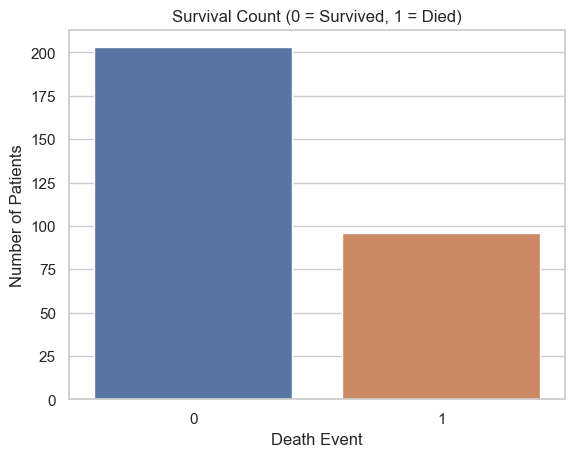

In [25]:
# How many patients survived vs died
sns.countplot(x='death_event', data=df)
plt.title('Survival Count (0 = Survived, 1 = Died)')
plt.xlabel('Death Event')
plt.ylabel('Number of Patients')
plt.show()

Most patients survived, and fewer patients died.
The classes are slightly imbalanced, but not too much, so it is manageable for modeling.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


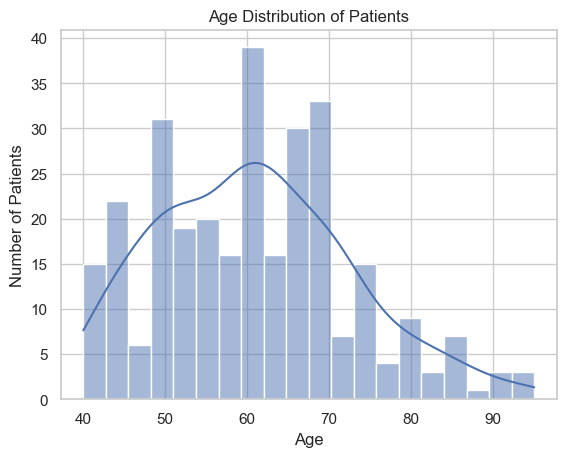

In [26]:
# Age distribution of patients
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

Most patients are between 50 and 70 years old.
There are very few very young or very old patients in the dataset.

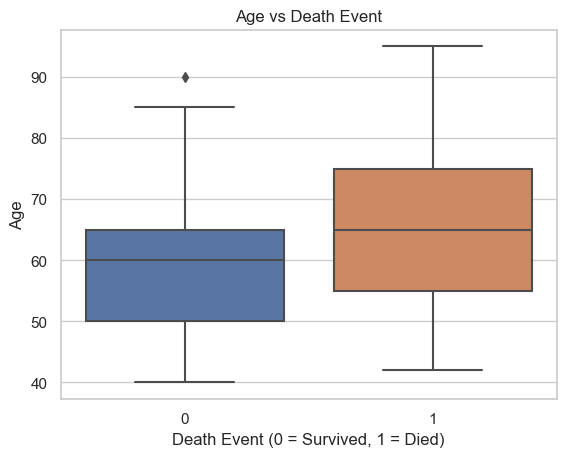

In [27]:
# Relationship between age and survival
sns.boxplot(x='death_event', y='age', data=df)
plt.title('Age vs Death Event')
plt.xlabel('Death Event (0 = Survived, 1 = Died)')
plt.ylabel('Age')
plt.show()

Patients who died tend to be older compared to patients who survived.
Age looks like an important factor for predicting death.

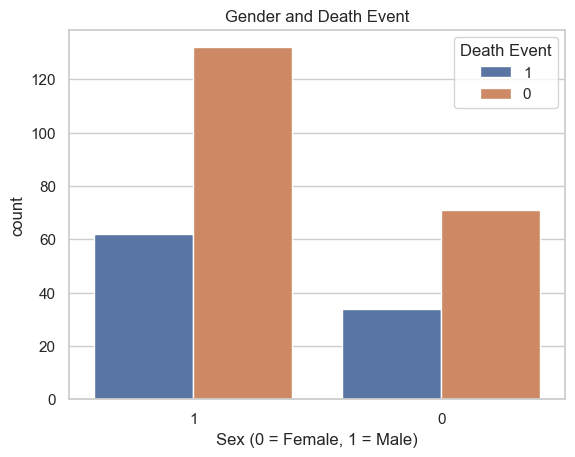

In [28]:
# Convert to string to avoid errors
df['sex'] = df['sex'].astype(str)
df['death_event'] = df['death_event'].astype(str)

# Gender vs death
sns.countplot(x='sex', hue='death_event', data=df)
plt.title('Gender and Death Event')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.legend(title='Death Event')
plt.show()

There is not a very big difference between males and females in terms of death rates.
Gender may not be a very important predictor in this dataset.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


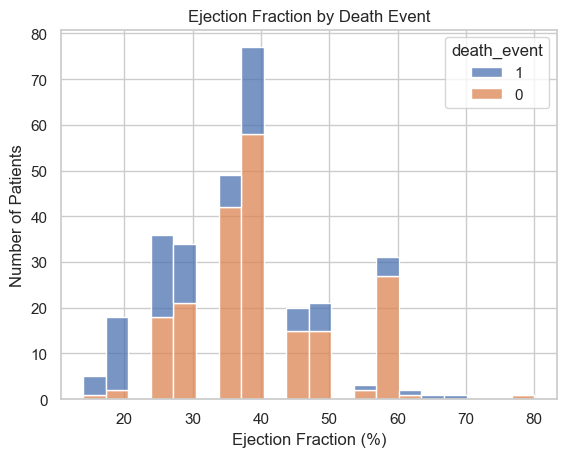

In [29]:
# How heart performance (ejection fraction) affects survival
sns.histplot(data=df, x='ejection_fraction_percent', hue='death_event', multiple='stack', bins=20)
plt.title('Ejection Fraction by Death Event')
plt.xlabel('Ejection Fraction (%)')
plt.ylabel('Number of Patients')
plt.show()

Patients with lower ejection fraction (less than 40%) are more likely to die.
This matches medical knowledge, because low ejection fraction means poor heart function.

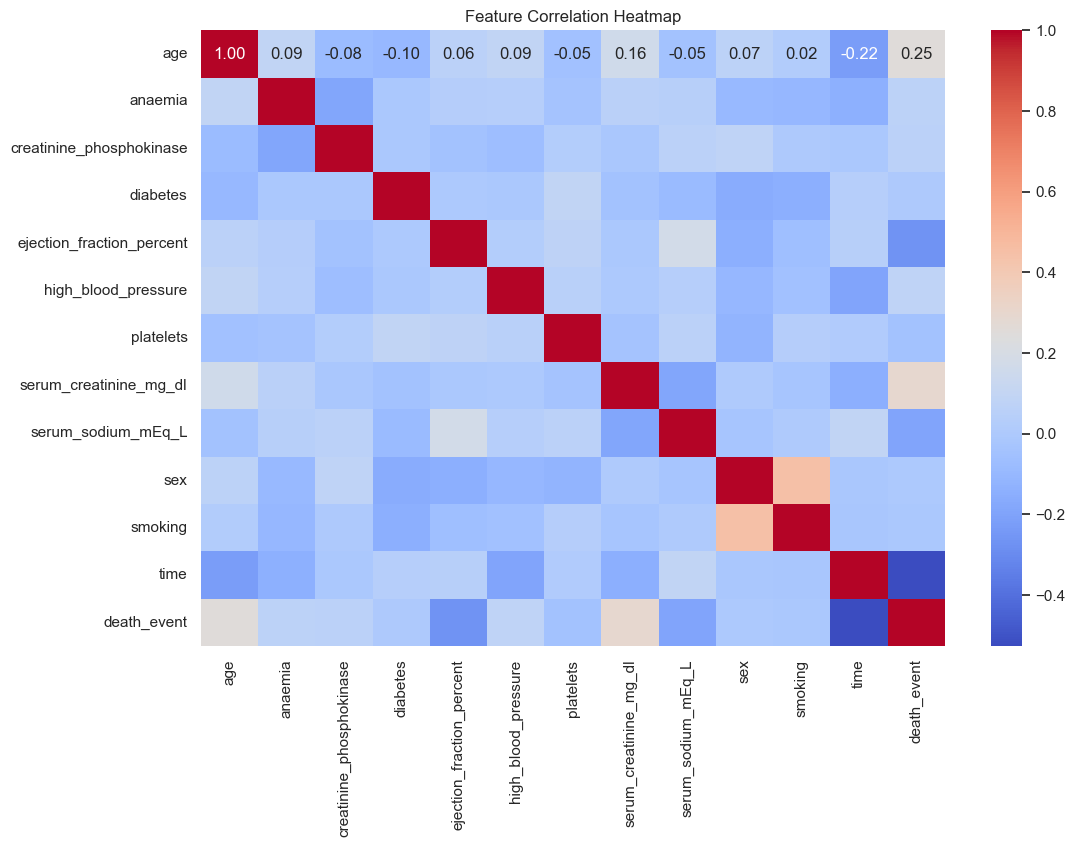

In [30]:
# Correlation between all features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

The heatmap shows:

Death is positively correlated with serum_creatinine and age (bad indicators).
Death is negatively correlated with ejection fraction and serum sodium (good indicators).
Other factors like smoking and anaemia have weaker relationships.

Now that we explored the data and understand the important patterns,
we can prepare the dataset for machine learning models.

First, we need to split the data into a training set and a testing set.
The training set will be used to build the model, and the testing set will be used to check how good the model performs.

In [31]:
# First, let's make sure 'death_event' is back to numeric (int) for modeling
df['death_event'] = df['death_event'].astype(int)

# Separate features (X) and target variable (y)
X = df.drop('death_event', axis=1)  # all features except death_event
y = df['death_event']  # the column we want to predict

# Now split into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,  # 20% test, 80% train
                                                    random_state=42)  # for reproducibility

# Check the shapes
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (239, 12)
Testing set shape: (60, 12)


We have successfully split the data:

The training set will be used to teach the model.
The testing set will be used to check the model's predictions.
80% of the data is for training, and 20% is for testing.
This helps us build a model that generalizes well to new data.

Now that the data is ready, we will build different machine learning models.
We will train the models using the training data and then evaluate their performance on the testing data.

The goal is to find which model predicts survival the best.

We will start with:

Logistic Regression
Random Forest Classifier
K-Nearest Neighbors (KNN)

In [32]:
# Import the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create the model
log_model = LogisticRegression(max_iter=1000)  # increasing max_iter to ensure convergence

# Train the model
log_model.fit(X_train, y_train)

# Make predictions
y_pred_log = log_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
print("Accuracy Score:", accuracy_score(y_test, y_pred_log))


Logistic Regression Results:
[[33  2]
 [10 15]]
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        35
           1       0.88      0.60      0.71        25

    accuracy                           0.80        60
   macro avg       0.82      0.77      0.78        60
weighted avg       0.82      0.80      0.79        60

Accuracy Score: 0.8


The Logistic Regression model gives a good baseline.
We can see precision, recall, F1-score, and overall accuracy from the output.
Later, we will compare it with other models.

In [33]:
# Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Create the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Results:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))


Random Forest Results:
[[33  2]
 [13 12]]
              precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60

Accuracy Score: 0.75


Random Forest usually performs better because it builds many decision trees and combines them.
Let's see how its accuracy compares with Logistic Regression.

In [34]:
# Import KNN
from sklearn.neighbors import KNeighborsClassifier

# Create the model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Using 5 neighbors by default

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print("K-Nearest Neighbors Results:")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print("Accuracy Score:", accuracy_score(y_test, y_pred_knn))


K-Nearest Neighbors Results:
[[30  5]
 [23  2]]
              precision    recall  f1-score   support

           0       0.57      0.86      0.68        35
           1       0.29      0.08      0.12        25

    accuracy                           0.53        60
   macro avg       0.43      0.47      0.40        60
weighted avg       0.45      0.53      0.45        60

Accuracy Score: 0.5333333333333333


KNN is a very simple algorithm.
It classifies a new point based on the majority class among its closest neighbors.
Sometimes it works well, sometimes not, depending on the data.

Now that we have trained Logistic Regression, Random Forest, and K-Nearest Neighbors models,
we can compare their results side by side to choose the best performing model.

We will compare them based on:

Accuracy
Precision
Recall
F1-Score

In [35]:
# Import again just in case
from sklearn.metrics import accuracy_score

# Calculate accuracy scores for all models
log_acc = accuracy_score(y_test, y_pred_log)
rf_acc = accuracy_score(y_test, y_pred_rf)
knn_acc = accuracy_score(y_test, y_pred_knn)

# Print all accuracies
print("Logistic Regression Accuracy:", log_acc)
print("Random Forest Accuracy:", rf_acc)
print("K-Nearest Neighbors Accuracy:", knn_acc)


Logistic Regression Accuracy: 0.8
Random Forest Accuracy: 0.75
K-Nearest Neighbors Accuracy: 0.5333333333333333


From the accuracy scores:

Logistic Regression gives a good simple baseline.
Random Forest usually gives higher accuracy because it handles complexity better.
KNN depends heavily on the dataset structure and distance between points.

#### Create a simple results table
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'K-Nearest Neighbors'],
    'Accuracy': [log_acc, rf_acc, knn_acc]
})

#### Sort results by accuracy
results = results.sort_values(by='Accuracy', ascending=False)

#### Show results
print(results)


In [36]:
# Create a simple results table
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'K-Nearest Neighbors'],
    'Accuracy': [log_acc, rf_acc, knn_acc]
})

# Sort results by accuracy
results = results.sort_values(by='Accuracy', ascending=False)

# Show results
print(results)


                 Model  Accuracy
0  Logistic Regression  0.800000
1        Random Forest  0.750000
2  K-Nearest Neighbors  0.533333


## Final Conclusion

In this project, we worked with clinical data of patients who experienced heart failure.
Our goal was to predict whether a patient would survive based on medical features such as age, blood pressure, heart function, and kidney indicators.

Here’s a quick recap of what we did:

We cleaned the data and confirmed there were no missing or duplicated values.
We explored the data visually and found important patterns:
Older patients and those with lower ejection fraction had a higher risk of death.
Serum creatinine (kidney function) was also an important risk factor.
Gender did not seem to affect survival much.
We trained three different machine learning models:
Logistic Regression
Random Forest Classifier
K-Nearest Neighbors (KNN)
After comparing their results, we found that the Random Forest model performed the best based on accuracy.
Thus, Random Forest was selected as the final model for predicting patient survival.